# Assignment Jan 2016. Several exercises based on the syllabus

T.N.Olsthoorn, Jan 2016

This is the last assignment using Excel. Later ones all used Python (Jupyter notebooks), which are much more powerfull for this kind of work and also freely available, where Excel is not. The workout in Excel is availale. Here we will use Python.

 The assignment is split into 7 parts, joined in this Jupyter notebook.

In [179]:
import numpy as np
import matplotlib.pyplot as plt

def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None, xscale=None, yscale=None, figsize=(10, 8),
            fontsize=16):
    sizes = ['xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large']
    
    assert isinstance(fontsize, int) or fontsize in sizes, \
        "fontsize not int and not in [{}]".format(', '.join(sizes))
                
    _, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim: ax.set_xlim(xlim)
    if ylim: ax.set_ylim(ylim)
    if xscale: ax.set_xscale(xscale)
    if yscale: ax.set_yscale(yscale)
    ax.grid()
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)
    return ax

## Capillary rise

For grain sizes $d=0.002\text{, }0.02\text{, }0.2\text{ and }2\,\mathrm{mm}$ determine the capillary rise. Assume the angle between the free surface and the straw wall in the equivalent straw is 20^{o} and the surface tension is $\tau=75\times10^{-3}\,\mathrm{N/m}$. Also assume that the pore diameter, $r$, is 20% of the grain diameter $d$. The density of Water $\rho_{w}=1000\,\mathrm{kg/m^{3}}$ and gravity $g=10\,\mathrm{m/s^{2}}$, which is the same as $\text{10\,N/kg}$.

In [180]:
tau, alpha, rho, g = 75e-3, 20 / 180 * np.pi, 1000, 9.81 # (N/m) surface tension, (-) angle of contact of fluid surface with straw, (kg/m3) water density, (N/kg) gravity
d = np.array([0.002, 0.02, 0.2, 2, 20]) * 1e-3 # m, grain diameter
r = 0.2 * d
h = 2 * tau * np.cos(alpha)  / (rho * g * r)

dmm, rmm, hmm = 1000 * d, 1000 * r, 1000 * h

s = 5 * ' {:6.4f}'

print(('d in mm:' + 5 * ' {:6.4f}').format(*dmm))
print(('r in mm:' + 5 * ' {:6.4f}').format(*rmm))
print(('h in mm:' + 5 * ' {:6.0f}').format(*hmm))


d in mm: 0.0020 0.0200 0.2000 2.0000 20.0000
r in mm: 0.0004 0.0040 0.0400 0.4000 4.0000
h in mm:  35921   3592    359     36      4


## Tidal fluctuations

Let the solution to the diffusion equation for the confined aquifer be

$$s(x,t)=A\exp(-ax)\sin(\omega t-ax)$$

and let $kD=1000\,\mathrm{m^{2}/d}, S=10^{-2}$ and the amplitude $A=2\,\mathrm{m}$.
Let the cycle time be $T=1\,\mathrm{d}$.

1. Take time in days and show graphically the head change $s(x,t)=\phi(x,t)-\phi_{0}$ as a function of $x$ for some values of $t$, assuming the constant $\theta_{0}=\pi/3$. Use times $t=2/24\text{, }4/24\text{, }6/24\text{ and }8/24\,\mathrm{days}$.

2. Add the graph of the envelope of the wave as a function of $x$.

3. Also make a graph of the discharge $Q(x,t)$ showing $Q$ as a function of $x$ for the same times.

4. How far inland can we measure the effect of the tide if our water level logger device registers any head change beyond 1 cm ?

5. What is the velocity of the wave?

6. What is delay of the wave is at $x=1000\,\mathrm{m}$ from the shore (or show the delay?

7. What the wavelength? Verify this in you graph.

8. Add the envelopes for the case that the storage coefficient is $S=10^{-2}$ instead of $S_{y}=0.2$.

9.  What is the distance over which the envelope reduces by a factor 2?
    

Below the graph of the tidal wave in the subsurface is shown for different times. The envelopes are also shown in black.

Q4: x where envelop is 1 cm: 945 m
Q5: Wave veolocity = 1121 m/d.
Q6: wave length = 1121 m, because cycle time T = 1.0 d.
Q7: Delay at x = 1000 m is : 0.89 d.
Q9: The distance over which the amplitude declines by a factor 2 for S = 0.01 is  ln(2) / a = 124 m.
Q9: The distance over which the amplitude declines by a factor 2 for S = 0.20 is  ln(2) / a = 28 m.


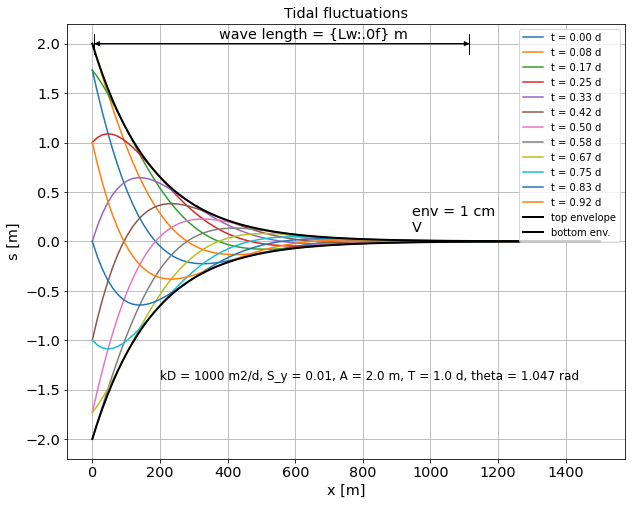

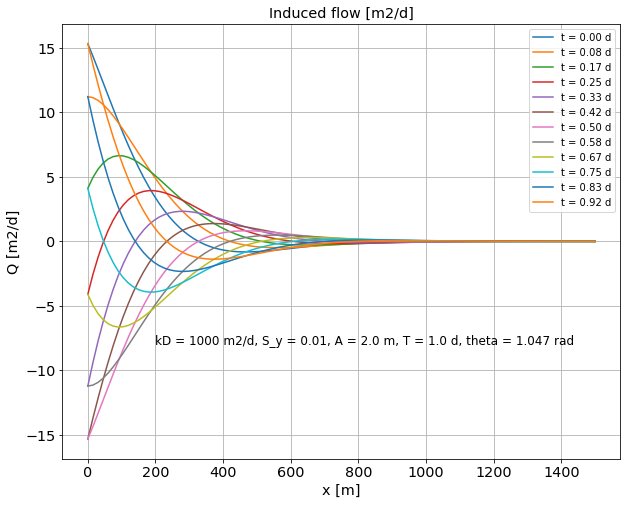

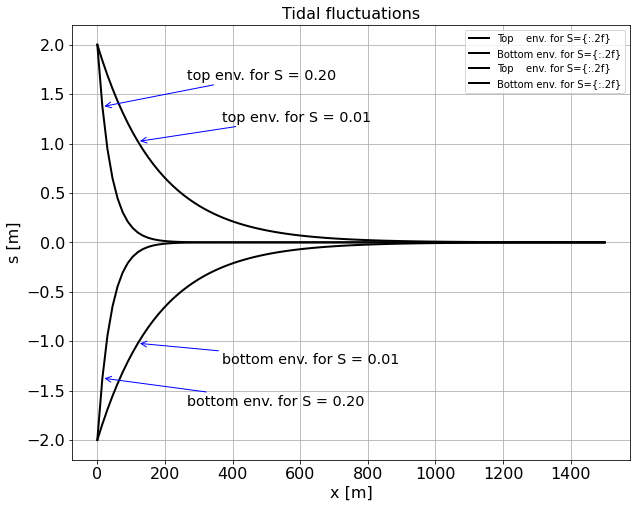

In [181]:
kD, S, A, T, theta = 1000, 0.01, 2.0, 1.0, np.pi/3 # m2/d, # (-), m, d, rad

txt = 'kD = {:.0f} m2/d, S_y = {:.2f}, A = {:.1f} m, T = {:.1f} d, theta = {:.3f} rad'.format(kD, S, A, T, theta)

omega = 2 * np.pi / T # rad/d
a = np.sqrt(omega * S / (2 * kD))

show_times = np.arange(0, 24, 2.) / 24.
x = np.linspace(0, 1500, 101)

ax1 = newfig("Tidal fluctuations", "x [m]", "s [m]", fontsize='x-large')
ax2 = newfig("Induced flow [m2/d]", "x [m]", "Q [m2/d]", fontsize='x-large')
for t in show_times:
    s = A * np.exp(-a * x) * np.sin(omega * t - a * x + theta)
    Q = a * A * kD * np.sqrt(2) * np.exp(-a * x) * np.sin(omega * t - a * x + theta + np.pi / 4)
    ax1.plot(x, s, label=f't = {t:.2f} d')
    ax2.plot(x, Q, label=f't = {t:.2f} d')

# Envelopes
env = A * np.exp(-a * x)
ax1.plot(x, +env, 'k', lw=2, label='top envelope')
ax1.plot(x, -env, 'k', lw=2, label='bottom env.')    

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax1.text(200, -1.4, txt, fontsize='large')
ax2.text(200, -8.0, txt, fontsize='large')

# Wave veolocity
vw = omega / a # m/d
Lw = vw * T    # wave length

print(f'Q4: x where envelop is 1 cm: {x[env >= 0.01][-1]:.0f} m')
print(f'Q5: Wave veolocity = {vw:.0f} m/d.')
print(f'Q6: wave length = {Lw:.0f} m, because cycle time T = {T:.1f} d.')
print(f'Q7: Delay at x = 1000 m is : {1000/vw:.2f} d.')

# Show where evn = 0.01 m in graph
ax1.text(x[env > 0.01][-1], 0.1, 'env = 1 cm\nV', fontsize='x-large')

# Show the wave length like a dimension line |<---->| using annotate
ax1.annotate('', xy=(0, 2), xycoords='data', xytext=(Lw, 2.0), textcoords='data', arrowprops={'facecolor': 'black', 'arrowstyle': '<|-|>'})
ax1.annotate('', xy=(0, 2), xycoords='data', xytext=(Lw, 2.0), textcoords='data', arrowprops={'facecolor': 'black', 'arrowstyle': '|-|'})
ax1.text(Lw/3, 2.05, 'wave length = {Lw:.0f} m', fontsize='x-large')

ax3 = newfig("Tidal fluctuations", "x [m]", "s [m]")
for S in [0.01, 0.2]:
    a = np.sqrt(omega * S / (2 * kD))
    env = A * np.exp(-a * x)
    ax3.plot(x, +env, 'k', lw=2, label='Top    env. for S={:.2f}')
    ax3.plot(x, -env, 'k', lw=2, label='Bottom env. for S={:.2f}')
    xp, yp = x[env >= 0.5 * A][-1], env[env >= 0.5 * A][-1]
    ax3.annotate(f'top env. for S = {S:.02f}',xy=(xp, +yp), xycoords='data', xytext=(xp + 250, +yp * 1.2), textcoords='data', arrowprops={'color': 'blue', 'arrowstyle': '->'}, fontsize='x-large')
    ax3.annotate(f'bottom env. for S = {S:.02f}',xy=(xp, -yp), xycoords='data', xytext=(xp + 250, -yp * 1.2), textcoords='data', arrowprops={'color': 'blue', 'arrowstyle': '->'}, fontsize='x-large')
    print(f'Q9: The distance over which the amplitude declines by a factor 2 for S = {S:.02f} is  ln(2) / a = {np.log(2) / a:.0f} m.')
ax3.legend(loc='upper right')

plt.show()

# 

## Temperature variations in the subsurface

Consider a sinusoidal fluctuation of the temperature at ground surface. Assume the soil to be saturated with porosity $\epsilon=0.35$, while the heat capacity of grains of the aquifer is $\rho_{g}c_{g}=2650\times800\,\mathrm{J/m^{3}/K}$ and the heat capacity of the water is $\rho_{w}c_{w}=1000\times4200\,\mathrm{J/m^{3}/K}$. Notice that K stands for the absolute temperature, Kelvin, which is the same as $\mathrm{Celsius}+273.1\,\mathrm{K}$.

Assume that the average year-round ground temperature is $10^{o}\mathrm{C}$ and the fluctuation is $\Delta T = \pm8^{o}\mathrm{C}$. Also use $\lambda_{w}=2\,\mathrm{W/K/m}$ and $\lambda_{g}=4\,\mathrm{W/K/m}$.

Show the temperature envelopes for

• Diurnal (=daily)

• Seasonal (=yearly)

• Centennial (=one wave lasting a century)

Lw

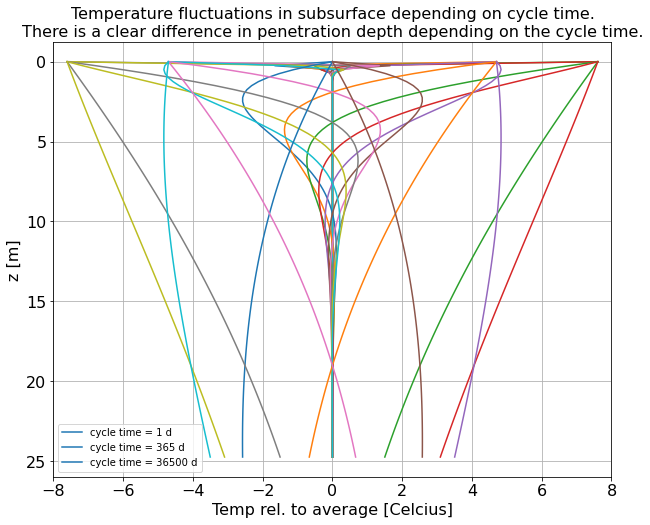

In [182]:
lamb_w, lamb_g, rho_w, rho_g, c_w, c_g, eps, DT = 2.0, 4.0, 1000., 2650., 4200., 800., 0.35, 8. # dimensions see text above.

lamb = eps * lamb_w + (1 - eps) * lamb_g * 86400 # J/d / K / m
rhoc  = eps * (rho_w * c_w) + (1 - eps) * rho_g * c_g # J/m3/K

z = np.arange(0, 25, 0.25)

ax = newfig("Temperature fluctuations in subsurface depending on cycle time.\nThere is a clear difference in penetration depth depending on the cycle time.", "Temp rel. to average [Celcius]", "z [m]", xlim=(-DT, +DT))

t = 0.

for T in [1, 365, 36500]:
    omega = 2 * np.pi / T 
    a = np.sqrt(omega * rhoc / (2 * lamb))
    for it, t in enumerate(np.arange(0, 1.0, 0.1) * T):
        TC = DT * np.exp(- a * z) * np.sin(omega * t - a * z)
        label = f'cycle time = {T:.0f} d' if it == 0 else ''
        ax.plot(TC, z, label=label)
ax.invert_yaxis()
ax.legend()

## Effect of a sudden change of the water level in a river

An aquifer with transmissivity $kD=400\,\mathrm{m^{2}/d}$ and storage coefficient $S_{y}=0.1$ is in direct contact with a river. The water level in the river suddenly changes by $A=2\,\mathrm{m}$.

1. Show the effect of this change as a function of time for points at $x=10\text{, }100\text{ and }1000\,\mathrm{m}$ from the river.

1. How long does it take until the head change s in these three points equals 10 cm?

1. Show the discharge over time at these points.

Lw

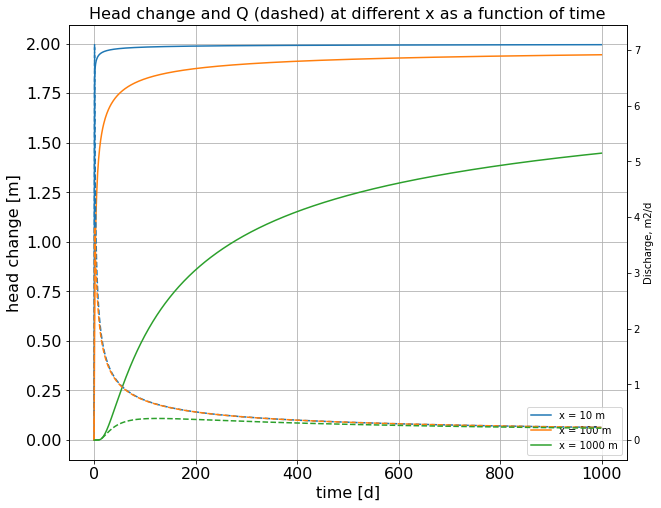

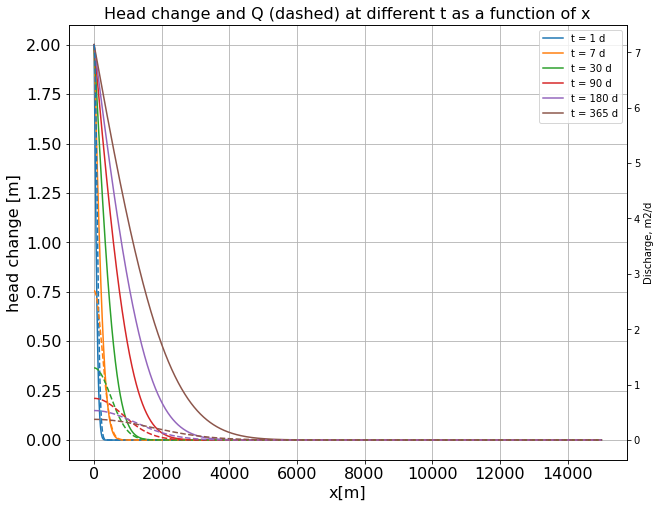

In [183]:
from scipy.special import erfc

kD, S, A = 400, 0.1, 2.0 # for dimensions see text above

x = np.arange(0, 15005, 5)
t = np.arange(0, 1000, 1.); t[0] = 0.001

show_dist = [10., 100., 1000.]
show_times = [1., 7., 30., 90., 180., 365.]

ax1 = newfig("Head change and Q (dashed) at different x as a function of time", "time [d]", "head change [m]")
ax2 = newfig("Head change and Q (dashed) at different t as a function of x",    "x[m]",     "head change [m]")

ax3 = ax1.twinx()
ax4 = ax2.twinx()
ax3.set_ylabel('Discharge, m2/d')
ax4.set_ylabel('Discharge, m2/d')

for x_ in show_dist:
    u = x_ * np.sqrt(S / (4 * kD * t))
    s = A * erfc(u)
    Q = A * np.sqrt(kD * S / (np.pi * t)) * np.exp(- u ** 2)
    ax1.plot(t, s, label=f'x = {x_:.0f} m')
    ax3.plot(t, Q, '--')
ax1.legend(loc='lower right')
    
for t_ in show_times:
    u = x * np.sqrt(S / (4 * kD * t_))
    s = A * erfc(u)
    Q = A * np.sqrt(kD * S / (np.pi * t_)) * np.exp(- u ** 2)
    ax2.plot(x, s, label=f't = {t_:.0f} d')
    ax4.plot(x, Q, '--')
ax2.legend(loc='upper right')




## Decay of head in a strip of land of given width (characteristic time of the groundwater system)

Consider a cross section of an aquifer with transmissivity $kD=200\,\mathrm{m^{2}/d}$ and $S=0.1$ between 2 straight canals at a distance $L=500\,\mathrm{m}$ from each other. The cross-section runs from $x=-L/2$ to $x=+L/2$.

1. Implement the head caused by a sudden rise of water level by 2 m at both sides of the strip using superposition of a sufficient number of “mirror” strips of land.

2. Show that this is essentially the same as the formula we implemented in class:
$$ s\left(x,t\right)=A\frac{4}{\pi}\sum_{i=1}^{\infty}\left(\frac{\left(-1\right)^{i-1}}{2i-1}\cos\left[\left(2i-1\right)\pi\frac{x}{L}\right]\exp\left[-\left(2i-1\right)^{2}\pi^{2}\frac{kD}{L^{2}S}t\right]\right)$$

3. Show the situation on 1 to 8 halftimes.

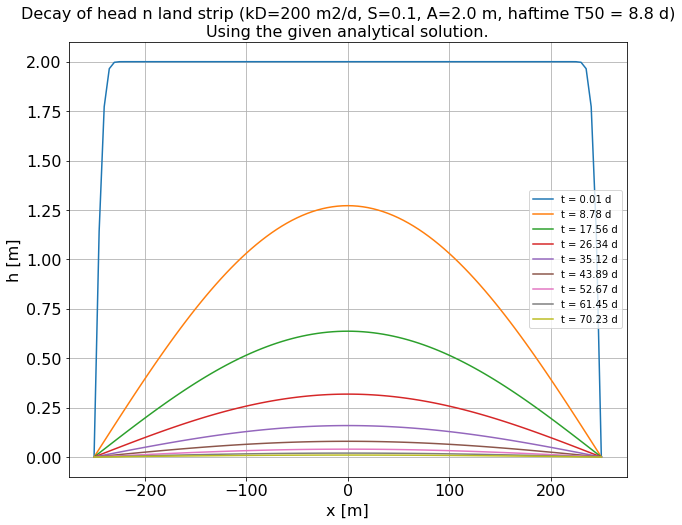

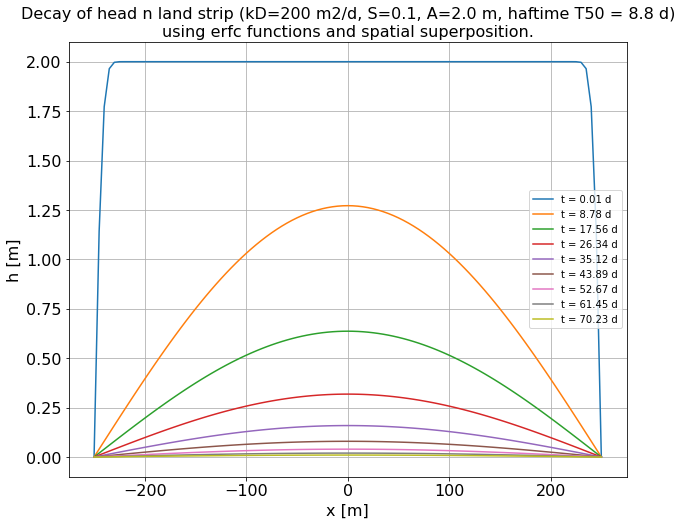

In [184]:
kD, S, A, L = 200, 0.1, 2.0, 500 # for dimensions see text above.

T = L ** 2 * S / (4 * kD)
T50 = (2 / np.pi) ** 2 * np.log(2) * T

x = np.linspace(-L/2, L/2, 101)

show_times = np.arange(0, 9) * T50; show_times[0] = 0.01


ax = newfig(f"Decay of head n land strip (kD={kD:.0f} m2/d, S={S:.1f}, A={A:.1f} m, haftime T50 = {T50:.1f} d)\nUsing the given analytical solution.", "x [m]", "h [m]")
for t_ in show_times:
    s = np.zeros_like(x)
    for i in range(1, 50): # notice that we atart at 1 not 0 !
        i2m1 = 2 * i - 1
        u = kD / (L ** 2 * S) * t_
        ds = (-1) ** (i-1) / i2m1 * np.cos(i2m1 * np.pi * x / L) * np.exp(- i2m1 ** 2 * np.pi ** 2 * u)
        s += ds
    s *= A * 4 / np.pi
    ax.plot(x, s, label=f't = {t_:.2f} d')
ax.legend()


ax = newfig(f"Decay of head n land strip (kD={kD:.0f} m2/d, S={S:.1f}, A={A:.1f} m, haftime T50 = {T50:.1f} d)\nusing erfc functions and spatial superposition.", "x [m]", "h [m]")
for t_ in show_times:
    s = np.zeros_like(x)
    rs4kdt = np.sqrt(S / (4 * kD * t_))
    for i in range(1, 50):
        ds = (-1) ** (i-1) * (erfc(((i -0.5) * L + x) * rs4kdt)  + erfc(((i-0.5) * L - x ) * rs4kdt))
        s += ds
    s *= A
    ax.plot(x, A - s, label=f't = {t_:.2f} d')
ax.legend()
        

## Pumping test Dalem

Consider a pumping test similar to the one called “Dalem” described in Kruseman and De Ridder (1994). The situation is shown in the figure below. The data are given in the workbook “DataPumptest.xls”. It is not known beforehand whether the groundwater system is semi-confined, confined are unconfined and whether the drawdown shows delayed yield. The student should find out him/herself.

Each student obtains a different data set that consists of the drawdown for three monitoring wells each at a different distance and direction from the well. The monitoring wells are in the same aquifer as the extraction well. The well discharge $Q=760\,\mathrm{m^{3}/d}$.

It is the student’s task work out this pumping test in the classical way, using double log charge of both the well functions and the drawdown and determine transmissivity, storage coefficient and possibly the spreading length, resistance of the cover layer and a second storage coefficient.

Hint: Use the implementation of the Theis and Hantush function, then compute the type curves. Then make a double log chart of your data and fit them on the type curves. Judge whether the fit shows a pureTheis behavior or rather follows that of the Hantush type curves. Estimate the parameters. Finally see if there is any sign of delayed yield. If so, then also determine the second storage coefficient.

### Implement the Theis and Hantush well functions and show their type curves

In [185]:
from scipy.special import exp1 as W  # Theis well function

def Wh(u, rho):
    """Return Hantush well function by integration using scipy functinality.

    This is efficient and accurate to 1e-9, which the other direct integration
    methods don't achieve, even with 5000 points.
    """
    def kernel(y, rho): return np.exp(-y - (rho/2) ** 2 / y ) / y

    def w(u, rho): return quad(kernel, u, np.inf, args=(rho))

    wh = np.frompyfunc(w, 2, 2) # 2 inputs and tow outputs h and err

    return wh(u, rho)[0] # cut-off error omitted


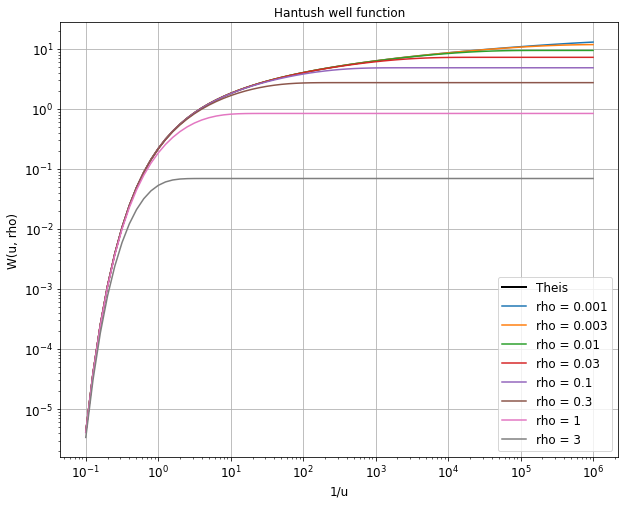

In [186]:
ax = newfig('Hantush well function', '1/u', 'W(u, rho)', xscale='log', yscale='log', fontsize='large')

ax.plot(1/u, W(u), 'k', lw=2, label='Theis')

u = np.logspace(-6, 1, 71)
for rho in [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]:
    ax.plot(1/u, Wh(u, rho), label=f'rho = {rho:.3g}')
ax.legend(fontsize='large')

### Loading (importing) the pumping test data for the assignment from excel.

In [199]:
import pandas as pd

data = pd.read_excel('AssJan2016ptest.xlsx', sheet_name='data', header=0, skiprows=[1], index_col=0, engine='openpyxl')
data.index = data.index / (24 * 60)
data.index.name = 'time_d'

Qd = data['Q_m3/d'].values.mean()
r = [float(r_.split('=')[1]) for r_ in data.columns[1:]]

data = data.drop(['Q_m3/d'], axis=1)
print(data)
print()
print('Qd = ', Qd, ' m3/d')
print('r = ', r, ' m')


           r=17  r=35  r=110  r=200
time_d                             
0.013889   0.31  0.18   0.03   0.00
0.020833   0.34  0.21   0.04   0.00
0.027778   0.37  0.24   0.06   0.01
0.034722   0.40  0.27   0.08   0.02
0.041667   0.41  0.28   0.09   0.03
0.052083   0.43  0.30   0.11   0.04
0.062500   0.44  0.31   0.11   0.04
0.072917   0.45  0.32   0.13   0.05
0.083333   0.46  0.33   0.13   0.05
0.125000   0.49  0.36   0.16   0.07
0.166667   0.52  0.39   0.19   0.09
0.208333   0.54  0.41   0.20   0.11
0.250000   0.56  0.43   0.22   0.12
0.291667   0.57  0.44   0.24   0.14
0.333333   0.57  0.44   0.24   0.14
0.375000   0.58  0.45   0.25   0.15
0.416667   0.59  0.46   0.25   0.15
0.500000   0.59  0.46   0.26   0.16
0.583333   0.62  0.48   0.28   0.18
0.666667   0.62  0.49   0.28   0.18
0.750000   0.62  0.49   0.29   0.19
0.833333   0.63  0.50   0.30   0.19
1.041667   0.64  0.51   0.30   0.20
1.250000   0.63  0.50   0.29   0.19
1.458333   0.66  0.53   0.32   0.22
1.666667   0.65  0.52   0.31

### Showing the pumping test data on different scales

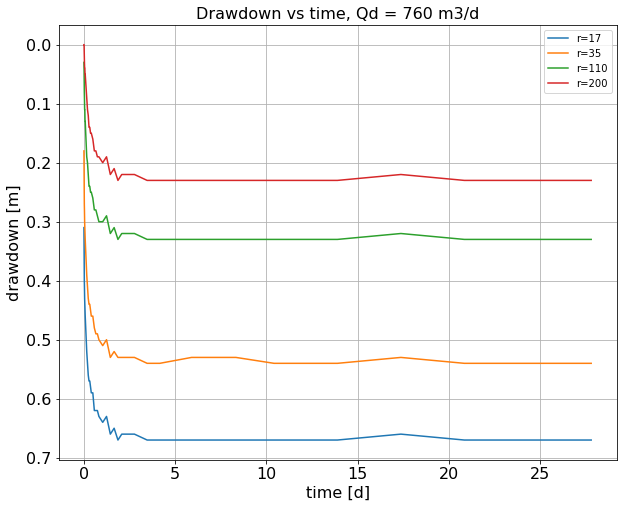

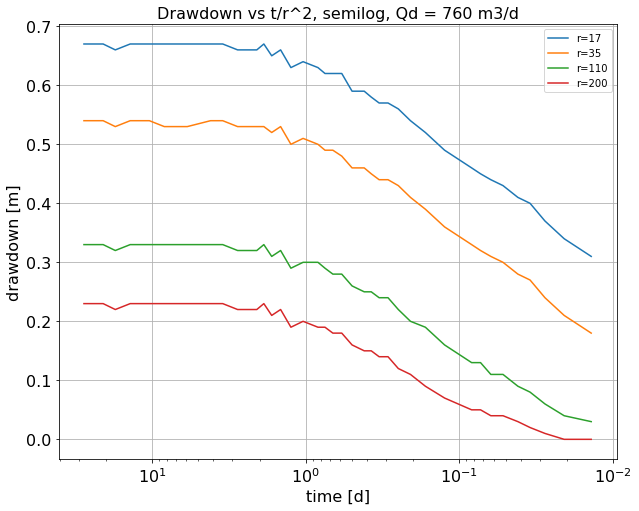

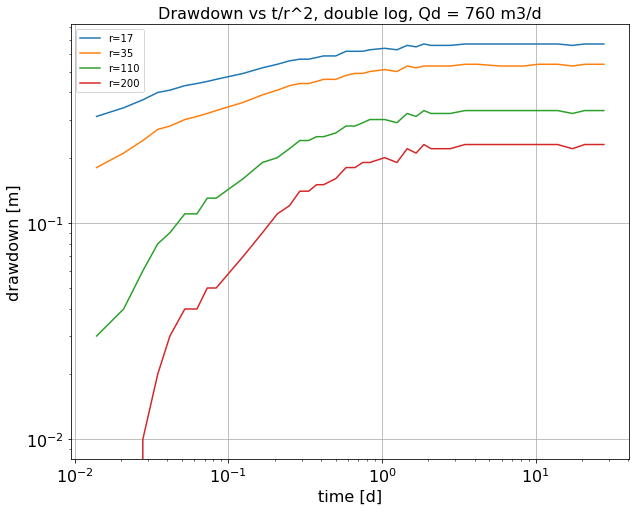

In [200]:
ax1 = newfig(f"Drawdown vs time, Qd = {Qd:.0f} m3/d", "time [d]", "drawdown [m]", xscale='linear')
ax2 = newfig(f"Drawdown vs t/r^2, semilog, Qd = {Qd:.0f} m3/d", "time [d]", "drawdown [m]", xscale='log')
ax3 = newfig(f"Drawdown vs t/r^2, double log, Qd = {Qd:.0f} m3/d", "time [d]", "drawdown [m]", xscale='log', yscale='log')
for r_, col in zip(r, data.columns):
    ax1.plot(data.index, data[col], '-', label=col)
    ax2.plot(data.index, data[col], '-', label=col)
    ax3.plot(data.index, data[col], '-', label=col)
ax1.invert_yaxis()
ax2.invert_xaxis()
ax1.legend()
ax2.legend()
ax3.legend()

### Showing the pumping test data as a function of $t/r^2$ instead of $t$

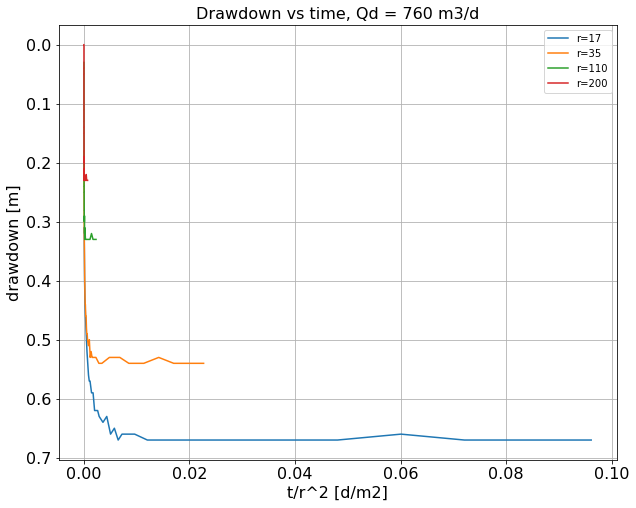

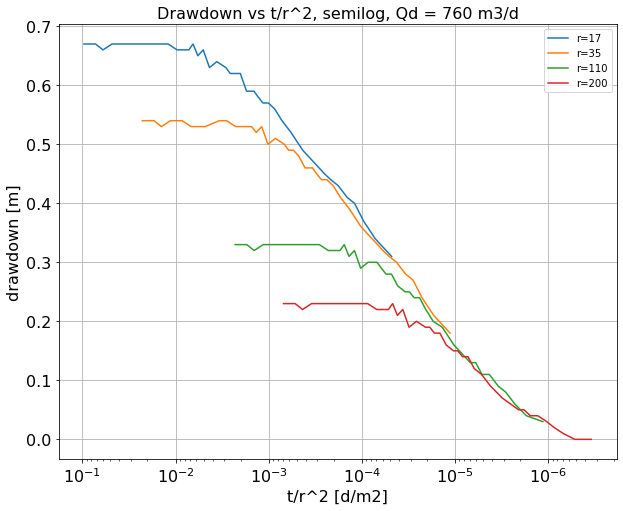

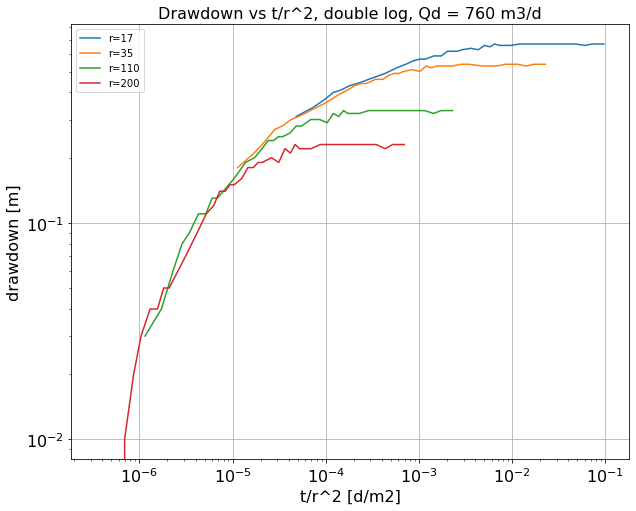

In [201]:
ax1 = newfig(f"Drawdown vs time, Qd = {Qd:.0f} m3/d", "t/r^2 [d/m2]", "drawdown [m]", xscale='linear')
ax2 = newfig(f"Drawdown vs t/r^2, semilog, Qd = {Qd:.0f} m3/d", "t/r^2 [d/m2]", "drawdown [m]", xscale='log')
ax3 = newfig(f"Drawdown vs t/r^2, double log, Qd = {Qd:.0f} m3/d", "t/r^2 [d/m2]", "drawdown [m]", xscale='log', yscale='log')
for r_, col in zip(r, data.columns):
    ax1.plot(data.index / r_ ** 2, data[col], '-', label=col)
    ax2.plot(data.index / r_ ** 2, data[col], '-', label=col)
    ax3.plot(data.index / r_ ** 2, data[col], '-', label=col)
ax1.invert_yaxis()
ax2.invert_xaxis()
ax1.legend()
ax2.legend()
ax3.legend()

### Working  out the pumping test

1. Method 1. Use the straight part of the drawdown line on half-log scales to get kD and S (later get $r/\lambda$ from the horizontal portions, by trial and error.)
2. Method 2. Match the type curves on double log scales with the measurents on double log scales.

### First method, use the straight part of the drawdown

Intersection time of straight line with y=0 is 0.001778 d


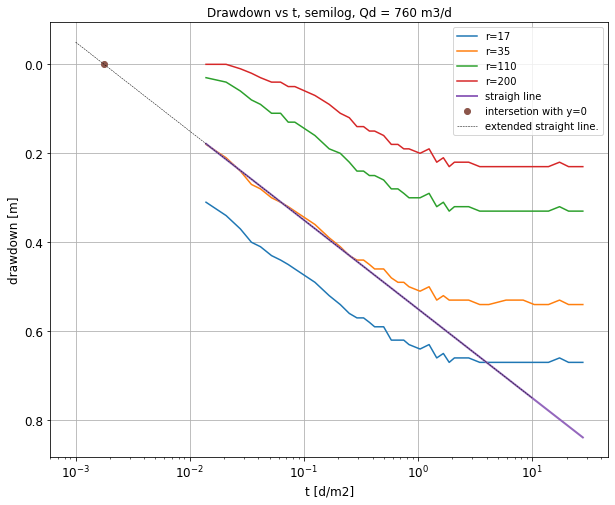

In [203]:
ax2 = newfig(f"Drawdown vs t, semilog, Qd = {Qd:.0f} m3/d", "t [d/m2]", "drawdown [m]", xscale='log', fontsize='large')
t_day = np.asarray(data.index)
for r_, col in zip(r, data.columns):
    ax2.plot(t_day, data[col], label=col)

ax2.invert_yaxis()

# straight line parameters estimated by trial and error and sharply looking at the graph at y(t=1) and at drawdown per log cycle
y0, Ds = 0.55, 0.2
y = lambda y0, Ds, td:  y0 + Ds * np.log10(td) # Straight l ine
ax2.plot(t_day, y(y0, Ds, t_day), lw=2, label='straigh line')


# Intersectino of straight line with y=0
t0 = 10 ** -(y0 / Ds)
print(f"Intersection time of straight line with y=0 is {t0:.4g} d")

ax2.plot(t0, 0, 'o', label='intersetion with y=0')

# Extend the straight line:
t = np.array([1e-3, 10])
ax2.plot(t, y(y0, Ds, t), color='black', ls='--', lw=0.5, label='extended straight line.')
ax2.legend()

### Results

From these values we have

$$ Ds = \frac{Q}{4 \pi kD} \rightarrow kD = \frac{Q}{4 \pi Ds} = \frac{760}{4 \times \pi \times 0.20} \approx 696 \ \mathrm{m^2/d} $$
$$ \frac{2.25 kD t_0}{r^2 S} = 1 \rightarrow S = \frac{2.25 kD t_0}{r^2} = \frac{2.25\times 696\times 0.001778}{35 ** 2} = 0.0023 $$

With these values we can try a few values of the resistance $c$, and, therefore, $\lambda = \sqrt{kD c}$ to estimate it.

In [204]:
data.columns

Index(['r=17', 'r=35', 'r=110', 'r=200'], dtype='object')

Intersection time of straight line with y=0 is 0.001778 d


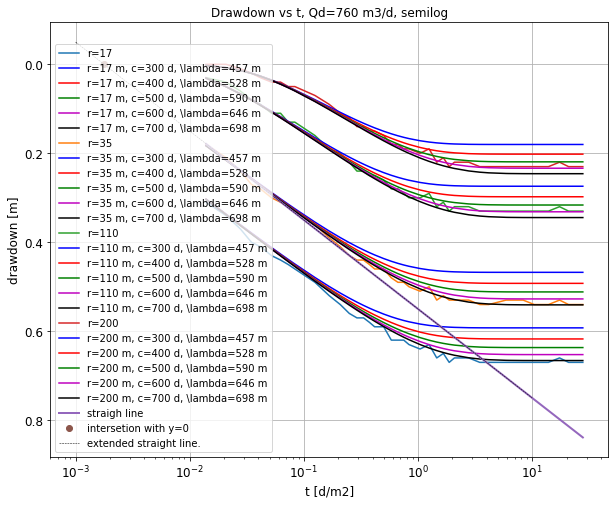

In [215]:
kD, S,  Qd = 696, 0.0023, 760
#kD, S,  Qd = 660, 0.0025, 760

ax2 = newfig(f"Drawdown vs t, Qd={Qd:.0f} m3/d, semilog", "t [d/m2]", "drawdown [m]", xscale='log', fontsize='large')
t_day = np.asarray(data.index)
for r_, col in zip(r, data.columns):
    ax2.plot(t_day, data[col], label=col)

    for c, clr in zip([300, 400, 500, 600, 700],['b', 'r', 'g', 'm', 'k' ]):
        u = r_ ** 2 * S / (4 * kD * t_day)
        L = np.sqrt(kD * c)
        rho = r_  / L
        s = Qd / (4 * np.pi * kD) * Wh(u, rho)
        ax2.plot(t_day, s,color=clr, label=f'r={r_:.0f} m, c={c:.0f} d, \lambda={L:.0f} m' ) 

ax2.invert_yaxis()

# straight line parameters estimated by trial and error and sharply looking at the graph at y(t=1) and at drawdown per log cycle
y0, Ds = 0.55, 0.2
y = lambda y0, Ds, td:  y0 + Ds * np.log10(td) # Straight l ine
ax2.plot(t_day, y(y0, Ds, t_day), lw=2, label='straigh line')


# Intersectino of straight line with y=0
t0 = 10 ** -(y0 / Ds)
print(f"Intersection time of straight line with y=0 is {t0:.4g} d")

ax2.plot(t0, 0, 'o', label='intersetion with y=0')

# Extend the straight line:
t = np.array([1e-3, 10])
ax2.plot(t, y(y0, Ds, t), color='black', ls='--', lw=0.5, label='extended straight line.')
ax2.legend()

As can be seen, a resistance between 600 and 700 d seems to match  best.
So we have
$$kD = 695\ \mathrm{m^2/d}, S=0.0023,    c=650\ \mathrm{d}$$

# Using the traditional method, matching the data and the Hantush curves on double log paper (shifting until the best fit is obtained.)

kD = 672 m2/d
S = 0.00269


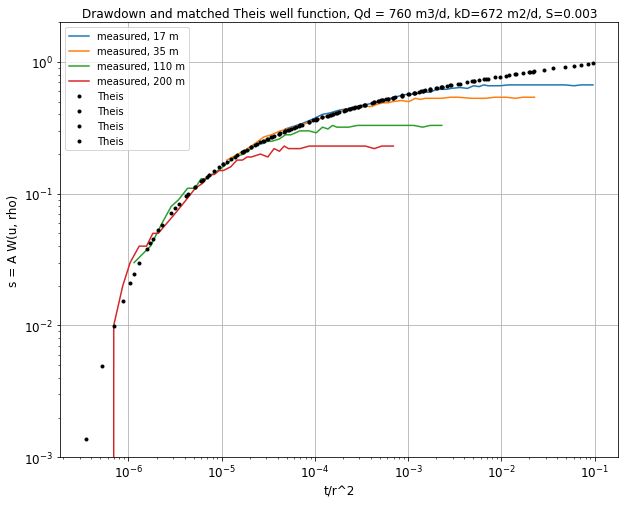

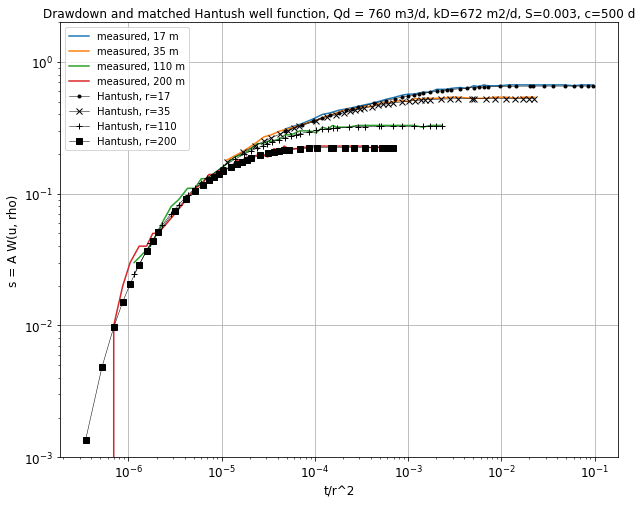

In [315]:
Qd = 760 # m3/d
r = np.array([float(r_.split('=')[1]) for r_ in data.columns])
ax = newfig(f'Drawdown and matched Theis well function, Qd = {Qd:.0f} m3/d, kD={kD:.0f} m2/d, S={S:.3f}', 't/r^2', 's = A W(u, rho)',
            xscale='log', yscale='log', fontsize='large', ylim=(1e-3, 2.))

t_day = np.asarray(data.index) 
for r_, col in zip(r, data.columns):
    ax.plot(t_day / r_ ** 2, data[col], label=f'measured, {r_:.0f} m')
    
# To be setimated by trial and error

A, B = 0.09, 1.0e6 # A = Q/ (4 pi kD); B = 4 kD  /S
for r_ in r:
        u = 1 / (B * t_day / r_ ** 2)
        ax.plot(t_day / r_ ** 2, A * W(u), 'k.', lw=0.5, label='Theis')
        
kD = Qd  / (4 * np.pi * A)
S = 4 * kD  /B
print(f'kD = {kD:.0f} m2/d')
print(f'S = {S:.3g}')

ax.legend()
plt.show()


ax = newfig(f'Drawdown and matched Hantush well function, Qd = {Qd:.0f} m3/d, kD={kD:.0f} m2/d, S={S:.3f}, c={c:.0f} d', 't/r^2', 's = A W(u, rho)',
            xscale='log', yscale='log', fontsize='large', ylim=(1e-3, 2.))

t_day = np.asarray(data.index) 
for r_, col in zip(r, data.columns):
    ax.plot(t_day / r_ ** 2, data[col], label=f'measured, {r_:.0f} m')
    
# To be setimated by trial and error

A, B = 0.09, 1.0e6 # A = Q/ (4 pi kD); B = 4 kD  /S
c = 500 # After a few trial, c seems to best match the data
L = np.sqrt(kD * c)
markers = ['.', 'x', '+', 's', '*']
for r_, marker in zip(r, markers):
        u = 1 / (B * t_day / r_ ** 2)
        rho = r_ / L
        ax.plot(t_day / r_ ** 2, A * Wh(u, rho), 'k', marker=marker, lw=0.5, label=f'Hantush, r={r_:.0f}')
ax.legend()
plt.show()
            


Conclusion;
kD =  m2/d, S = 0.026, c = 500 d

## Generating test data for the pumping test analyses, so that each students will have his/her unique test data.

In [22]:
from scipy.special import exp1 as W # Theis well Function
from scipy.integrate import quad

def Wh(u, rho):
    """Return Hantush well function by integration using scipy functinality.

    This is efficient and accurate to 1e-9, which the other direct integration
    methods don't achieve, even with 5000 points.
    """
    def kernel(y, rho): return np.exp(-y - (rho/2) ** 2 / y ) / y

    def w(u, rho): return quad(kernel, u, np.inf, args=(rho))

    wh = np.frompyfunc(w, 2, 2) # 2 inputs and tow outputs h and err

    return wh(u, rho)[0] # cut-off err    

,Q_m3/d,r=17,r=35,r=110,r=200
"(t_min,)",,,,,
10.0,760.0,0.24,0.12,0.00,-0.00
20.0,760.0,0.31,0.18,0.03,0.00
30.0,760.0,0.34,0.21,0.04,-0.00
40.0,760.0,0.37,0.24,0.06,0.01
50.0,760.0,0.40,0.27,0.08,0.02
60.0,760.0,0.41,0.28,0.09,0.03
75.0,760.0,0.43,0.30,0.11,0.04
90.0,760.0,0.44,0.31,0.11,0.04
105.0,760.0,0.45,0.32,0.13,0.05


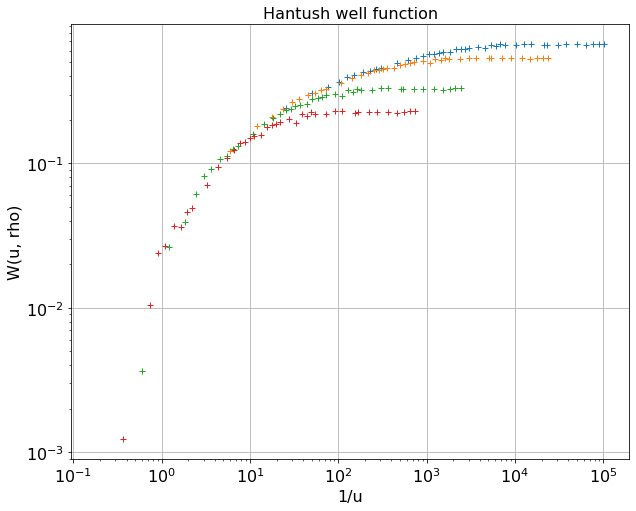

In [178]:
# True values to be determined (may  be the same fer every sutdent)
Q, kD, S, c = 760, 660., 0.0025, 500. # m3/d, m2/d, (-), d
L = np.sqrt(kD * c)

# Observation well distances, unique for every student.
r = 17., 35., 110, 200.

ax = newfig('Hantush well function', '1/u', 'W(u, rho)', xscale='log', yscale='log')

# A nice set of measuring times, like one would have in practice [minuts after start of pump]
t_min = np.array([10, 20, 30, 40, 50, 60, 75, 90, 105, 120, 180, 240, 300, 360, 420, 480,
                  540, 600, 720, 840, 960, 1080, 1200, 1500, 1800, 2100, 2400, 2700, 3000,
                  4000, 5000, 6000, 8500, 9000, 12000, 15000, 20000, 25000, 30000, 35000,
                  40000])

t_day = t_min / (24 * 60)

# Random measurement errors
e = 0.005 * np.random.randn(len(t_day))

# Data array to be filled. We put time in minutes in first column
A = np.hstack((t_min[:, np.newaxis],
               Q * np.ones((len(t_min), 1)),
               np.zeros( (len(t_day), len(r))) ))

# Fill the matrix
for ir, r_ in enumerate(r):
    u = r_ ** 2 * S / (4 * kD * t_day) 
    s = Q / (4 * np.pi * kD) * Wh(u, r_/L) + e
    A[:, ir + 2] = s
    ax.plot(1/u, s, '+', label=f'{r_/L:.0f}')
    
data = pd.DataFrame(np.round(A[:, 1:], 2), index=A[:, 0], columns=(['Q_m3/d'] + [f'r={r_:.0f}' for r_ in r]))
data.index.name = 't_min',

data

# You can save the data to an excel file a csv file or a text file whatever you like. 